<center>

# Decision Trees
## Bonus Lectures - DATA 5600

20 November 2024
</center>

In [30]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix


In [3]:
# read in data
roomba = pd.read_csv('roomba_survey.csv')
roomba.head()

,sys_RespNum,sys_StartTime,sys_EndTime,sys_LastQuestion,sys_CBC_CBC1_design,sys_CBC_CBC1_design_info,S1,S1A,S1B,S1C,...,D3Neighborhood,D4MaritalStatus,D4A,D4B,D5Occupation,D5Occupation_11_other,D6Education,D6Education_6_other,D7Ethnicity,D7Ethnicity_7_other
0,2,1456893467,1456893958,Finished,"[[1,1,1,2,1,2,2,1],[2,3,2,2,1,1,2,2],[3,2,1,2,...","{""atts""=>[[1,4,0],[2,2,1],[3,2,1],[4,2,1],[5,2...",4,NaN,NaN,NaN,...,2,2,NaN,NaN,8,NaN,3,NaN,2,NaN
1,3,1456893643,1456893998,Finished,"[[1,4,2,1,2,1,1,1],[2,3,1,1,1,2,2,4],[3,1,2,2,...","{""atts""=>[[1,4,0],[2,2,1],[3,2,1],[4,2,1],[5,2...",1,2.0,2.0,1.0,...,2,2,NaN,NaN,1,NaN,5,NaN,3,NaN
2,4,1456893769,1456893998,Finished,"[[1,3,2,2,1,2,1,4],[2,4,1,2,1,2,2,1],[3,1,1,1,...","{""atts""=>[[1,4,0],[2,2,1],[3,2,1],[4,2,1],[5,2...",4,NaN,NaN,NaN,...,3,1,NaN,NaN,1,NaN,4,NaN,1,NaN
3,9,1456895699,1456904874,Finished,"[[1,2,2,1,1,1,1,3],[2,1,1,2,2,2,2,1],[3,3,1,1,...","{""atts""=>[[1,4,0],[2,2,1],[3,2,1],[4,2,1],[5,2...",4,NaN,NaN,NaN,...,2,3,1.0,5.0,1,NaN,3,NaN,1,NaN
4,23,1456924935,1456925731,Finished,"[[1,1,1,2,1,2,1,4],[2,4,2,1,2,1,2,1],[3,2,2,2,...","{""atts""=>[[1,4,0],[2,2,1],[3,2,1],[4,2,1],[5,2...",4,NaN,NaN,NaN,...,2,1,NaN,NaN,11,retired,2,NaN,1,NaN


In [5]:
roomba.value_counts('S1')

S1
4    229
3     63
1     40
Name: count, dtype: int64

In [ ]:
# recode outcome variable
roomba['segment'] = roomba['S1'].map({1: 'own', 3: 'shopping', 4: 'considering'})
roomba['segment'].value_counts()

segment
considering    229
shopping        63
own             40
Name: count, dtype: int64

In [16]:
# X should be all columns that begin with 'CleaningAttitudes'
X = roomba.filter(like='CleaningAttitudes')
y = roomba['segment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5600, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
y_train.value_counts()

(265, 11) (265,)
(67, 11) (67,)


segment
considering    183
shopping        50
own             32
Name: count, dtype: int64

### Fit the decision tree

In [33]:
# fit the decision tree
dt = DecisionTreeClassifier(random_state=5600)
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.5671641791044776

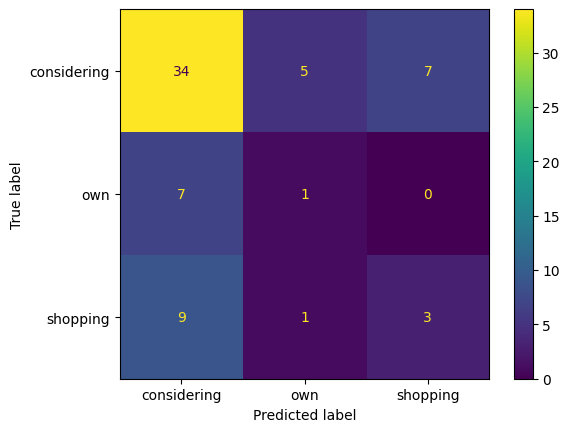

In [32]:
# plot the confusion matrix with ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, dt.predict(X_test)), display_labels=dt.classes_).plot()
